In [1]:
install.packages("plotly")
install.packages("reshape2")

library(ggplot2)
library(plotly)
library(reshape2)


file_list <- list.files(path = "content/sample_data/WorldCupMatches.csv", recursive = TRUE, full.names = TRUE)

# Print the file paths
for (file in file_list) {
  print(file)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
players <- read.csv("/content/sample_data/WorldCupPlayers.csv")
matches <- read.csv("/content/sample_data/WorldCupMatches.csv")
world_cup <- read.csv("/content/sample_data/WorldCups.csv")


In [4]:
head(players)

,RoundID,MatchID,Team.Initials,Coach.Name,Line.up,Shirt.Number,Player.Name,Position,Event
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,
2,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,
3,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,,G40'
4,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,,G70'
5,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,,
6,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,


In [5]:
head(matches)

,Year,Datetime,Stage,Stadium,City,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,Win.conditions,Attendance,Half.time.Home.Goals,Half.time.Away.Goals,Referee,Assistant.1,Assistant.2,RoundID,MatchID,Home.Team.Initials,Away.Team.Initials
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
2,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
3,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
4,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
5,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
6,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX


In [6]:
tail(matches)

,Year,Datetime,Stage,Stadium,City,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,Win.conditions,Attendance,Half.time.Home.Goals,Half.time.Away.Goals,Referee,Assistant.1,Assistant.2,RoundID,MatchID,Home.Team.Initials,Away.Team.Initials
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
4567,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,
4568,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,
4569,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,
4570,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,
4571,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,
4572,NA,,,,,,NA,NA,,,NA,NA,NA,,,,NA,NA,,


In [7]:
head(world_cup,10)

,Year,Country,Winner,RunnersUp,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
3,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
4,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
5,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
6,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81
7,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
8,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
9,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975


Data CLeaning

In [8]:
matches <- matches[!is.na(matches$Year), ]
tail(matches)

,Year,Datetime,Stage,Stadium,City,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,Win.conditions,Attendance,Half.time.Home.Goals,Half.time.Away.Goals,Referee,Assistant.1,Assistant.2,RoundID,MatchID,Home.Team.Initials,Away.Team.Initials
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
847,2014,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953,300186504,ARG,BEL
848,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
849,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
850,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
851,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED
852,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,74738,0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959,300186501,GER,ARG


In [9]:
home_team_counts <- table(matches$Home.Team.Name)
show(home_team_counts)




                   Algeria                     Angola 
                         6                          1 
                 Argentina                  Australia 
                        54                          6 
                   Austria                    Belgium 
                        13                         18 
                   Bolivia                     Brazil 
                         1                         82 
                  Bulgaria                   Cameroon 
                         7                         11 
                    Canada                      Chile 
                         1                         14 
                  China PR                   Colombia 
                         1                          7 
                Costa Rica                    Croatia 
                         7                          3 
                      Cuba             Czech Republic 
                         2                          2 
         

In [10]:
# Search for patterns containing 'rn">' in the "Home Team Name" column
filtered_matches <- matches[grep("rn\">", matches$Home.Team.Name), ]

# Count occurrences of each unique value in the filtered column
names_counts <- table(filtered_matches$`Home.Team.Name`)

# Print the unts
print(names_counts)



rn">Bosnia and Herzegovina    rn">Republic of Ireland 
                         1                          5 
 rn">Serbia and Montenegro    rn">Trinidad and Tobago 
                         1                          1 
  rn">United Arab Emirates 
                         1 


In [11]:
names <- rownames(names_counts)
wrong <- gsub('rn">', '', names)
print(list(wrong))

[[1]]
[1] "Bosnia and Herzegovina" "Republic of Ireland"    "Serbia and Montenegro" 
[4] "Trinidad and Tobago"    "United Arab Emirates"  



In [12]:
n <- nrow(names_counts)
i <- 1
while (i <= n) {
  values <- names_counts[i]
  wrong <- as.list(values)
  print(wrong)
  i <- i + 1
}

$`rn">Bosnia and Herzegovina`
[1] 1

$`rn">Republic of Ireland`
[1] 5

$`rn">Serbia and Montenegro`
[1] 1

$`rn">Trinidad and Tobago`
[1] 1

$`rn">United Arab Emirates`
[1] 1



In [13]:
names <- rownames(names_counts)
correct <- unique(sapply(names, function(x) {
  gsub('rn">', '', x)
}))
print(correct)

[1] "Bosnia and Herzegovina" "Republic of Ireland"    "Serbia and Montenegro" 
[4] "Trinidad and Tobago"    "United Arab Emirates"  


In [14]:
old_names <- c('Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana')
new_names <- c('Germany', 'Maracan Stadium', 'Maracan Stadium')

In [15]:
# Initialize the 'wrong' and 'correct' vectors
wrong <- c("Republic of Ireland", "Trinidad and Tobago", "Serbia and Montenegro", "Bosnia and Herzegovina", "United Arab Emirates")
correct <- c("Republic of Ireland", "Trinidad and Tobago", "Serbia and Montenegro", "Bosnia and Herzegovina", "United Arab Emirates")

# Combine the old and new names
old_name <- c("Germany FR", "Maracan?? - Est??dio Jornalista M??rio Filho", "Estadio do Maracana")
new_name <- c("Germany", "Maracan Stadium", "Maracan Stadium")

# Append the old names to the 'wrong' vector
wrong <- c(wrong, old_name)

# Append the new names to the 'correct' vector
correct <- c(correct, new_name)

# Print the 'wrong' and 'correct' vectors
print(wrong)
print(correct)

[1] "Republic of Ireland"                         
[2] "Trinidad and Tobago"                         
[3] "Serbia and Montenegro"                       
[4] "Bosnia and Herzegovina"                      
[5] "United Arab Emirates"                        
[6] "Germany FR"                                  
[7] "Maracan?? - Est??dio Jornalista M??rio Filho"
[8] "Estadio do Maracana"                         
[1] "Republic of Ireland"    "Trinidad and Tobago"    "Serbia and Montenegro" 
[4] "Bosnia and Herzegovina" "United Arab Emirates"   "Germany"               
[7] "Maracan Stadium"        "Maracan Stadium"       


In [16]:
# Replace values in 'world_cup'
for (i in seq_along(wrong)) {
  world_cup <- gsub(wrong[i], correct[i], world_cup, fixed = TRUE)
}

# Replace values in 'matches'
for (i in seq_along(wrong)) {
  matches <- gsub(wrong[i], correct[i], matches, fixed = TRUE)
}

# Replace values in 'players'
for (i in seq_along(wrong)) {
  players <- gsub(wrong[i], correct[i], players, fixed = TRUE)
}

In [17]:
names <- matches[grepl('rn">', matches)]
names_counts <- table(names)
print(names_counts)

< table of extent 0 >



Most Number of World Cup Winning Title

In [18]:
world_cup <- read.csv("/content/sample_data/WorldCups.csv")
winner <- table(world_cup$Winner)
show(winner)


 Argentina     Brazil    England     France    Germany Germany FR      Italy 
         2          5          1          1          1          3          4 
     Spain    Uruguay 
         1          2 


In [19]:
world_cup <- read.csv("/content/sample_data/WorldCups.csv")
runnerup <- table(world_cup$RunnersUp)
runnerup


     Argentina         Brazil Czechoslovakia         France        Germany 
             3              2              2              1              1 
    Germany FR        Hungary          Italy    Netherlands         Sweden 
             3              2              2              3              1 

In [20]:
third = table(world_cup$Third)
third


    Austria      Brazil       Chile     Croatia      France     Germany 
          1           2           1           1           2           3 
 Germany FR       Italy Netherlands      Poland    Portugal      Sweden 
          1           1           1           2           1           2 
     Turkey         USA 
          1           1 

In [21]:
# Create a list of tables
tables <- list(winner, runnerup, third)

# Merge the tables by "Country" column
teams_r <- Reduce(function(x, y) merge(x, y, by = "Var1", all = TRUE), tables)

# Replace NA values with 0
teams_r[is.na(teams_r)] <- 0

# Rename columns
colnames(teams_r) <- c("Country", "Winner", "Runner-up", "Third")

# Print the combined counts
print(teams_r)


          Country Winner Runner-up Third
1       Argentina      2         3     0
2          Brazil      5         2     2
3         England      1         0     0
4          France      1         1     2
5         Germany      1         1     3
6      Germany FR      3         3     1
7           Italy      4         2     1
8           Spain      1         0     0
9         Uruguay      2         0     0
10 Czechoslovakia      0         2     0
11        Hungary      0         2     0
12    Netherlands      0         3     1
13         Sweden      0         1     2
14        Austria      0         0     1
15          Chile      0         0     1
16        Croatia      0         0     1
17         Poland      0         0     2
18       Portugal      0         0     1
19         Turkey      0         0     1
20            USA      0         0     1


In [22]:
#teams = cbind(winner, runnerup, third)
#teams = ifelse(is.na(teams), 0, teams)
#print(teams)

In [23]:
install.packages("plotly")
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(ggplot2)


Using Country as id variables



ERROR: Error in ggplotGrob(): argument "x" is missing, with no default


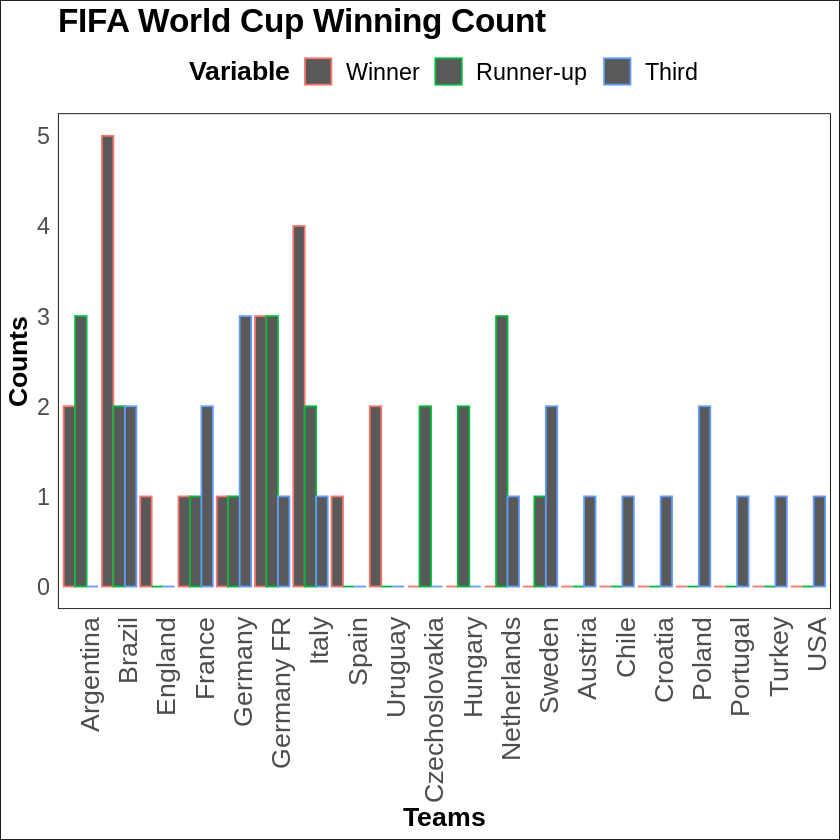

In [25]:
library(ggplot2)

teams_r_melted <- melt(teams_r)

names(teams_r_melted) <- c("Team", "Variable", "Value")

ggplot(data = teams_r_melted, aes(x = Team, y = Value, color = Variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "FIFA World Cup Winning Count",
       x = "Teams",
       y = "Counts",
       color = "Variable") +
      theme_minimal() +
      theme(legend.position = "top",
            plot.title = element_text(size = 20, face = "bold"),  # Increase title size and bold
            axis.title = element_text(size = 16, face = "bold"),  # Increase axis label size and bold
            axis.text.x = element_text(size = 16,angle = 90, hjust = 1),     # Rotate x-axis labels vertically
            axis.text.y = element_text(size = 14),  # Increase y-axis text size
            legend.text = element_text(size = 14),  # Increase legend text size
            legend.title = element_text(size = 16, face = "bold"),  # Increase legend title size and bold
            panel.grid.major = element_blank(),  # Remove major gridlines
            panel.grid.minor = element_blank(),  # Remove minor gridlines
            panel.background = element_rect(fill = "white"),  # Set panel background color
            plot.background = element_rect(fill = "white"))  # Set plot background color


print(ggplotGrob())

Number of Goal Per Country

In [26]:
head(matches)

[1] "c(1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1930, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1934, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1938, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, \n1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, \n1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, \n1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, \n1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, \n1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, \n1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, \n2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2

In [27]:
matches <- read.csv("/content/sample_data/WorldCupMatches.csv")
home <- table(matches$Home.Team.Name, matches$Home.Team.Goals)
away <- table(matches$Away.Team.Name, matches$Away.Team.Goals)
home[is.na(home)] <- 0
away[is.na(away)] <- 0
home <- home[-1, ]
away <- away[-1, ]

In [28]:
#match_results <- data.frame(
#  home_team <- table(matches$Home.Team.Name),
#  home_goals <-  table(matches$Home.Team.Goals),
#  away_team = table(matches$Away.Team.Name),
#  away_goals <- table(matches$Away.Team.Goals)
#)
#
#
#goals_by_country <- rep(0, length(unique(c(match_results$home_team, match_results$away_team))))
#names(goals_by_country) <- unique(c(match_results$home_team, match_results$away_team))
#
## Aggregate goals by country
#for (i in 1:nrow(match_results)) {
#  goals_by_country[match_results[i, "home_team"]] <- goals_by_country[match_results[i, "home_team"]] + match_results[i, "home_goals"]
#  goals_by_country[match_results[i, "away_team"]] <- goals_by_country[match_results[i, "away_team"]] + match_results[i, "away_goals"]
#}
#
## Print goals by country
#print(goals_by_country)

# **It works the same**

In [29]:
##Read the CSV file
#matches <- read.csv("/content/sample_data/WorldCupMatches.csv")
#
## Subset the data for home and away teams, and drop rows with missing values
#home <- subset(matches, select = c("Home.Team.Name", "Home.Team.Goals"))
#home <- home[complete.cases(home), ]
#
#away <- subset(matches, select = c("Away.Team.Name", "Away.Team.Goals"))
#away <- away[complete.cases(away), ]
#
## Create tables for home and away teams
#home <- table(home$Home.Team.Name, home$Home.Team.Goals)
#away <- table(away$Away.Team.Name, away$Away.Team.Goals)
#
## Replace NA values with 0
#home[is.na(home)] <- 0
#away[is.na(away)] <- 0

In [30]:
print(home)
print(away)

                            
                              0  1  2  3  4  5  6  7  8  9 10
  Algeria                     3  2  0  1  0  0  0  0  0  0  0
  Angola                      1  0  0  0  0  0  0  0  0  0  0
  Argentina                   6 18 15  6  4  1  4  0  0  0  0
  Australia                   3  0  2  1  0  0  0  0  0  0  0
  Austria                     2  2  4  3  0  1  0  1  0  0  0
  Belgium                     2  8  5  3  0  0  0  0  0  0  0
  Bolivia                     0  1  0  0  0  0  0  0  0  0  0
  Brazil                     12 20 18 14 12  3  2  1  0  0  0
  Bulgaria                    0  5  1  0  1  0  0  0  0  0  0
  Cameroon                    3  5  3  0  0  0  0  0  0  0  0
  Canada                      1  0  0  0  0  0  0  0  0  0  0
  Chile                       1  7  2  3  0  1  0  0  0  0  0
  China PR                    1  0  0  0  0  0  0  0  0  0  0
  Colombia                    1  2  3  1  0  0  0  0  0  0  0
  Costa Rica                  1  5  1  0 

In [31]:
numeric_home <- as.matrix(home)
home_sums <- rowSums(numeric_home)
print(home_sums)

                   Algeria                     Angola 
                         6                          1 
                 Argentina                  Australia 
                        54                          6 
                   Austria                    Belgium 
                        13                         18 
                   Bolivia                     Brazil 
                         1                         82 
                  Bulgaria                   Cameroon 
                         7                         11 
                    Canada                      Chile 
                         1                         14 
                  China PR                   Colombia 
                         1                          7 
                Costa Rica                    Croatia 
                         7                          3 
                      Cuba             Czech Republic 
                         2                          2 
          

In [32]:
numeric_away <- as.matrix(away)
away_sums <- rowSums(numeric_away)
print(away_sums)

                   Algeria                     Angola 
                         8                          2 
                 Argentina                  Australia 
                        27                          7 
                   Austria                    Belgium 
                        16                         25 
                   Bolivia                     Brazil 
                         5                         26 
                  Bulgaria                   Cameroon 
                        19                         12 
                    Canada                      Chile 
                         2                         20 
                  China PR                   Colombia 
                         2                         13 
                Costa Rica                    Croatia 
                        10                         13 
                      Cuba             Czech Republic 
                         1                          1 
          

In [33]:
goals <- rowSums(cbind(home_sums, away_sums))
print(goals)

Warning message in cbind(home_sums, away_sums):
“number of rows of result is not a multiple of vector length (arg 1)”


                   Algeria                     Angola 
                        14                          3 
                 Argentina                  Australia 
                        81                         13 
                   Austria                    Belgium 
                        29                         43 
                   Bolivia                     Brazil 
                         6                        108 
                  Bulgaria                   Cameroon 
                        26                         23 
                    Canada                      Chile 
                         3                         34 
                  China PR                   Colombia 
                         3                         20 
                Costa Rica                    Croatia 
                        17                         16 
                      Cuba             Czech Republic 
                         3                          3 
          

In [34]:
goals_df <- data.frame(Countries = names(goals), Goals = goals)

# Print the data frame
print(goals_df, row.names = FALSE)
#row.names = FALSE == I added this because the list of countries were shown 2 times, so it removes all the unrequired rows

                  Countries Goals
                    Algeria    14
                     Angola     3
                  Argentina    81
                  Australia    13
                    Austria    29
                    Belgium    43
                    Bolivia     6
                     Brazil   108
                   Bulgaria    26
                   Cameroon    23
                     Canada     3
                      Chile    34
                   China PR     3
                   Colombia    20
                 Costa Rica    17
                    Croatia    16
                       Cuba     3
             Czech Republic     3
             Czechoslovakia    30
              C�te d'Ivoire     9
                    Denmark    16
          Dutch East Indies     5
                    Ecuador    41
                      Egypt    35
                El Salvador     9
                    England    61
                     France    73
                  German DR     7
              

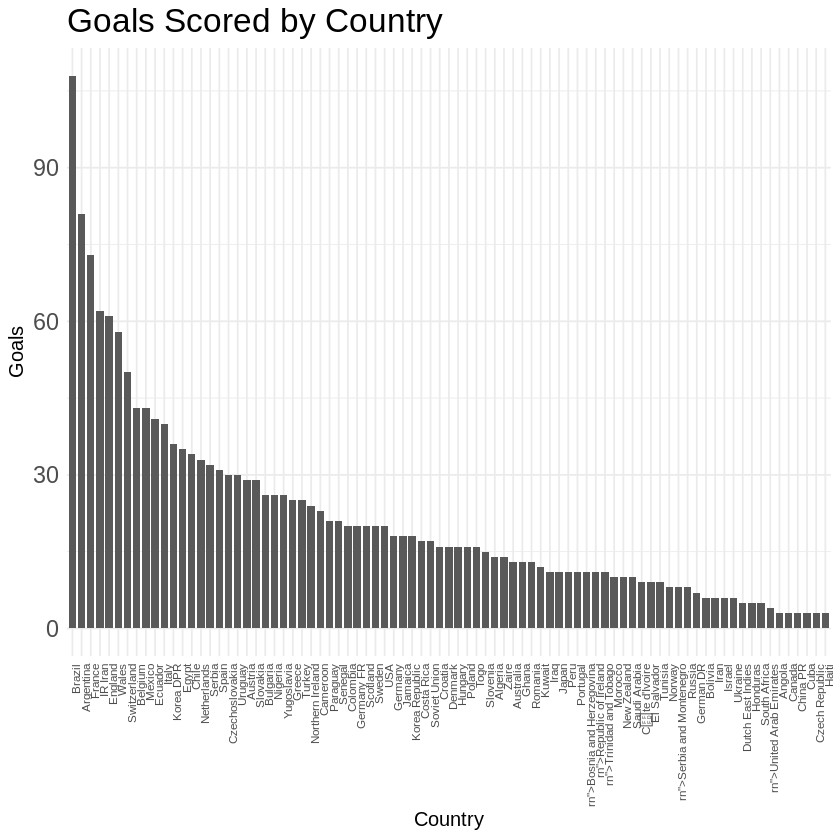

In [35]:
# Load the ggplot2 package
library(ggplot2)

goals_df <- goals_df[order(-goals_df$Goals), ]

goals_df$Countries <- factor(goals_df$Countries, levels = goals_df$Countries)


# Create a bar graph using ggplot2 with larger bars
ggplot(goals_df, aes(x = Countries, y = Goals)) +
  geom_bar(stat = "identity", width = 0.8) +
  labs(x = "Country", y = "Goals", title = "Goals Scored by Country") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(size = 7,angle = 90, hjust = 1),
    axis.text.y = element_text(size = 14),
    legend.position = "none" # hide the legend
  )

Attendance, Number of Teams, Goals, and Matches per Cup

In [36]:
world_cup$Attendance <- as.integer(gsub("\\.", "", world_cup$Attendance))

In [37]:
head(world_cup)

,Year,Country,Winner,RunnersUp,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
2,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
3,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,3757
4,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
5,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
6,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,81981


No summary function supplied, defaulting to `mean_se()`


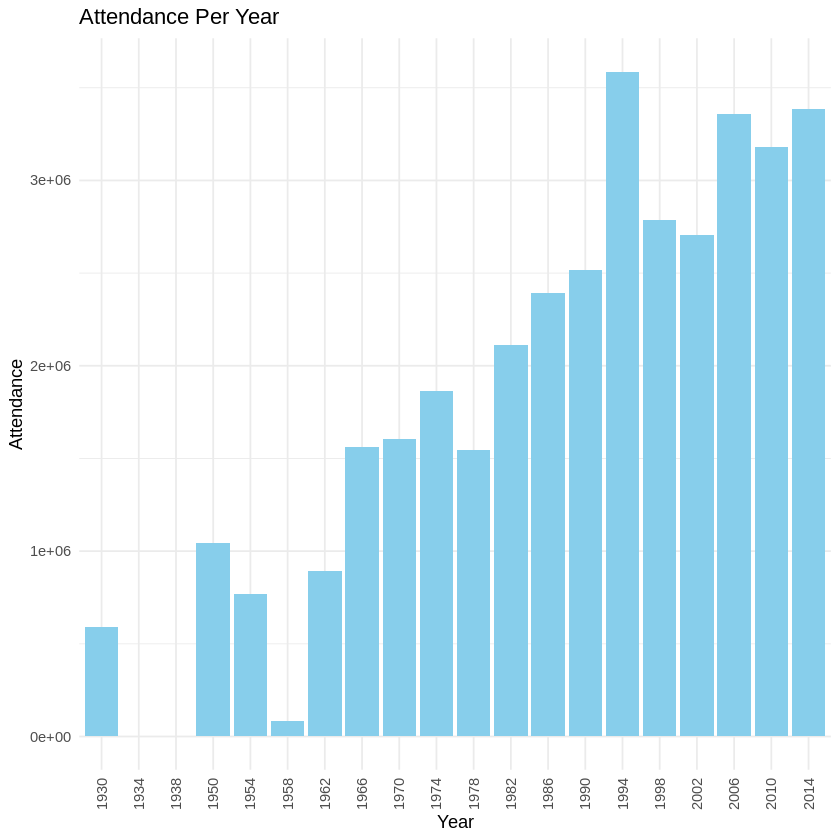

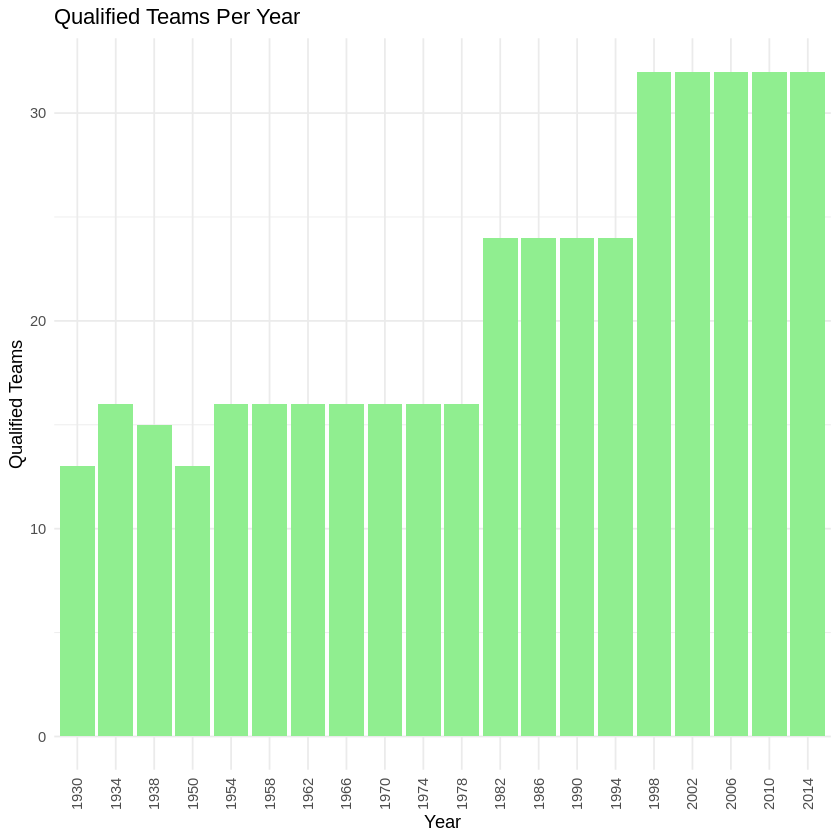

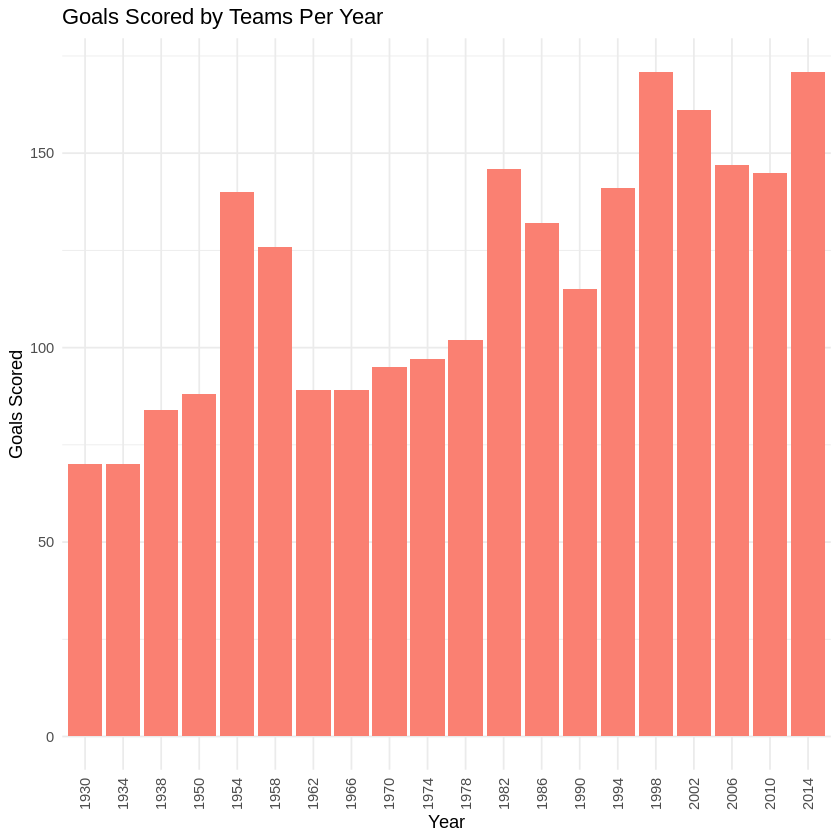

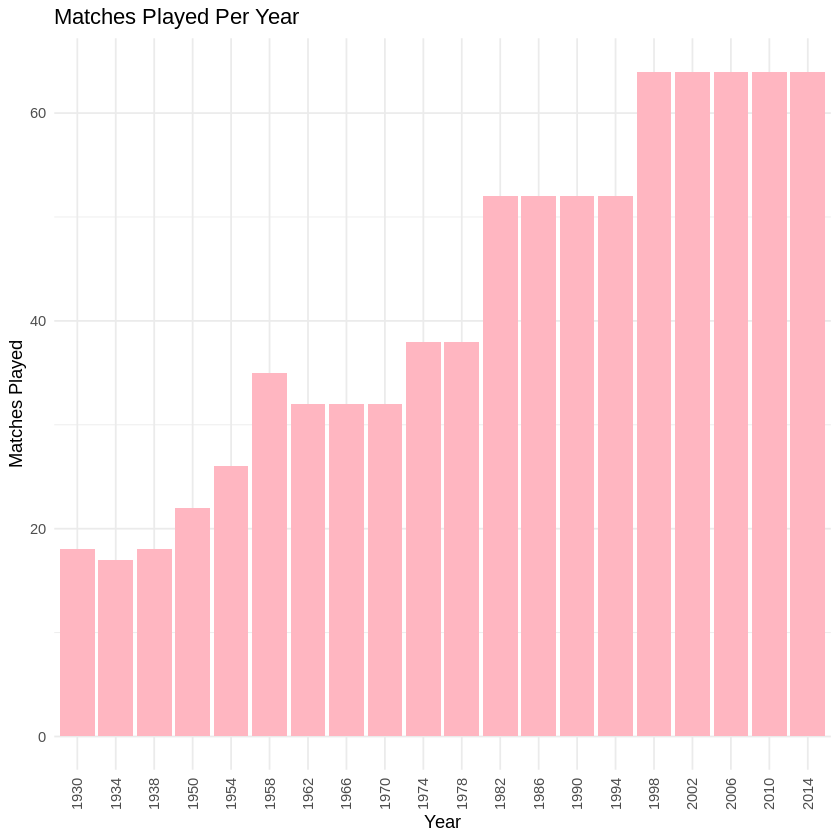

In [38]:
library(ggplot2)

world_cup$Year <- factor(world_cup$Year, levels = world_cup$Year)

# Plot attendance per year
ggplot(world_cup, aes(x = Year, y = Attendance)) +
  geom_bar(stat = "summary", fill = "skyblue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Attendance Per Year", x = "Year", y = "Attendance") +
  ylim(0, NA)  # Set the y-axis limit to remove negative values if any



# Plot qualified teams per year
ggplot(world_cup, aes(x = Year, y = QualifiedTeams)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Qualified Teams Per Year", x = "Year", y = "Qualified Teams") +
  ylim(0, NA)  # Set the y-axis limit to remove negative values if any

# Plot goals scored by teams per year
ggplot(world_cup, aes(x = Year, y = GoalsScored)) +
  geom_bar(stat = "identity", fill = "salmon") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Goals Scored by Teams Per Year", x = "Year", y = "Goals Scored") +
  ylim(0, NA)  # Set the y-axis limit to remove negative values if any

# Plot matches played per year
ggplot(world_cup, aes(x = Year, y = MatchesPlayed)) +
  geom_bar(stat = "identity", fill = "lightpink") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Matches Played Per Year", x = "Year", y = "Matches Played") +
  ylim(0, NA)  # Set the y-axis limit to remove negative values if any


In [39]:
head(matches)

,Year,Datetime,Stage,Stadium,City,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,Win.conditions,Attendance,Half.time.Home.Goals,Half.time.Away.Goals,Referee,Assistant.1,Assistant.2,RoundID,MatchID,Home.Team.Initials,Away.Team.Initials
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
2,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
3,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
4,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
5,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
6,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX


In [58]:
library(dplyr)

home <- matches %>%
  group_by(Year, Home.Team.Name) %>%
  summarise(total_goals = sum(Home.Team.Goals), , .groups = 'drop')

print(home)


# A tibble: 367 × 3
    Year Home.Team.Name total_goals
   <int> <chr>                <int>
 1  1930 Argentina               16
 2  1930 Brazil                   4
 3  1930 Chile                    4
 4  1930 France                   4
 5  1930 Paraguay                 1
 6  1930 Romania                  3
 7  1930 USA                      6
 8  1930 Uruguay                 15
 9  1930 Yugoslavia               6
10  1934 Austria                  5
# ℹ 357 more rows


In [43]:
library(dplyr)

away <- matches %>%
  group_by(Year, Away.Team.Name) %>%
  summarise(total_goals = sum(Away.Team.Goals), .groups = 'drop')

print(away)

# A tibble: 412 × 3
    Year Away.Team.Name total_goals
   <int> <chr>                <int>
 1  1930 Argentina                2
 2  1930 Belgium                  0
 3  1930 Bolivia                  0
 4  1930 Brazil                   1
 5  1930 Chile                    1
 6  1930 France                   0
 7  1930 Mexico                   4
 8  1930 Paraguay                 0
 9  1930 Peru                     1
10  1930 Romania                  0
# ℹ 402 more rows


In [68]:
library(dplyr)

# Assuming 'home' and 'away' are your data frames

combined <- bind_rows(home, away)

# Summarize the total goals for each team
goals <- combined %>%
  group_by(Year, Country = if_else(!is.na(Home.Team.Name), Home.Team.Name, Away.Team.Name)) %>%
  summarise(Goals = sum(total_goals), , .groups = "drop")
goals <- goals[-1,]

# Print the resulting data frame
print(goals)

# A tibble: 427 × 3
    Year Country   Goals
   <int> <chr>     <int>
 1  1930 Argentina    18
 2  1930 Belgium       0
 3  1930 Bolivia       0
 4  1930 Brazil        5
 5  1930 Chile         5
 6  1930 France        4
 7  1930 Mexico        4
 8  1930 Paraguay      1
 9  1930 Peru          1
10  1930 Romania       3
# ℹ 417 more rows


Top goals >=5 with top 5 teams

In [94]:
library(dplyr)

top_teams <- goals %>%
  filter(Goals >= 5) %>%
  arrange(desc(Goals)) %>%
  group_by(Year) %>%
  slice_head(n = 5)

# Print the resulting dataframe
print(top_teams)

# A tibble: 100 × 3
# Groups:   Year [20]
    Year Country        Goals
   <int> <chr>          <int>
 1  1930 Argentina         18
 2  1930 Uruguay           15
 3  1930 USA                7
 4  1930 Yugoslavia         7
 5  1930 Brazil             5
 6  1934 Italy             12
 7  1934 Germany           11
 8  1934 Czechoslovakia     9
 9  1934 Austria            7
10  1934 Hungary            5
# ℹ 90 more rows


In [96]:
x <- goals$Year
y <-  goals$Goals

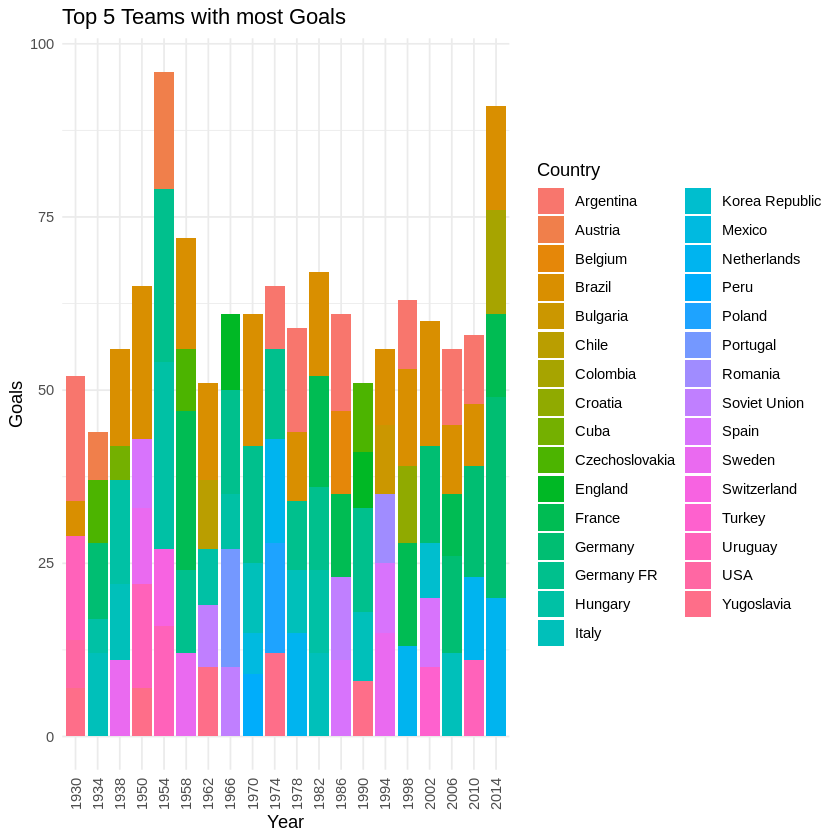

In [110]:
library(ggplot2)

# Convert Year variable in top_teams to factor with desired levels
top_teams$Year <- factor(top_teams$Year, levels = unique(top_teams$Year))

# Creating the plot using ggplot
ggplot(top_teams, aes(x = Year, y = Goals, fill = Country)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 5 Teams with most Goals", x = "Year", y = "Goals") +
  theme_minimal() +
   theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))



Matches With Heighest Number Of Attendance

In [21]:
# Load necessary libraries
library(ggplot2)

# Assuming 'matches' is your dataframe

# Convert 'Datetime' column to POSIXct date-time object
matches$Datetime <- as.POSIXct(matches$Datetime, format = "%d %b %Y - %H:%M")

# Extract date and time components
matches$Date <- as.Date(matches$Datetime)
matches$Time <- format(matches$Datetime, "%H:%M")

# Plot attendance against date-time
ggplot(matches, aes(x = Datetime, y = Attendance)) +
  geom_point() +
  labs(x = "Date and Time", y = "Attendance",
       title = "Matches with Highest Attendance") +
  theme_minimal()


ERROR while rich displaying an object: Error in seq.int(0, to0 - from, by): 'to' must be a finite number

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.

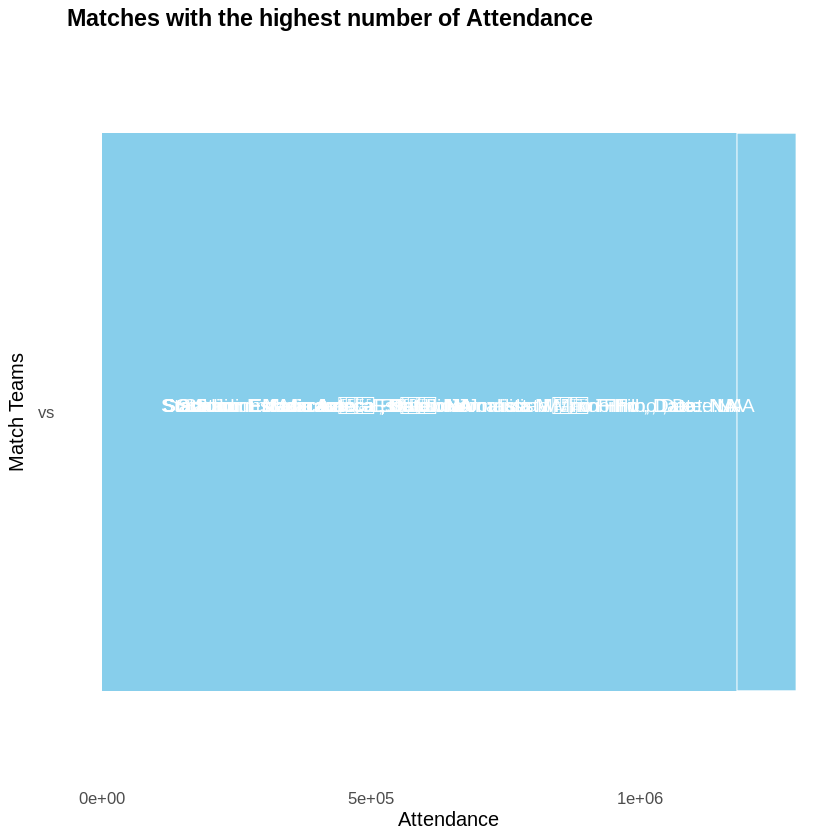

In [6]:
matches <- read.csv("/content/sample_data/WorldCupMatches.csv")
library(ggplot2)
library(dplyr)

# Convert 'Datetime' column to POSIXct date-time object
matches$Datetime <- as.POSIXct(matches$Datetime, format = "%Y-%m-%d %H:%M:%S")

# Sort matches dataframe by 'Attendance' column in descending order and select top 10 rows
top10 <- matches %>%
  arrange(desc(Attendance)) %>%
  slice_head(n = 10)

# Create a new column 'vs' concatenating 'Home Team Name' and 'Away Team Name'
top10$vs <- paste(top10$`Home Team Name`, "vs", top10$`Away Team Name`)

# Plotting
ggplot(top10, aes(x = Attendance, y = reorder(vs, Attendance))) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Attendance", y = "Match Teams", title = "Matches with the highest number of Attendance") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        axis.title = element_text(size = 12),
        plot.title = element_text(size = 14, face = "bold"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank()) +
  geom_text(aes(label = paste("Stadium: ", Stadium, ", Date: ", Datetime)), hjust = 0, vjust = 0, size = 4, color = "white", position = position_dodge(width = 0.9))


**Stadium with Highest Average Attendance**

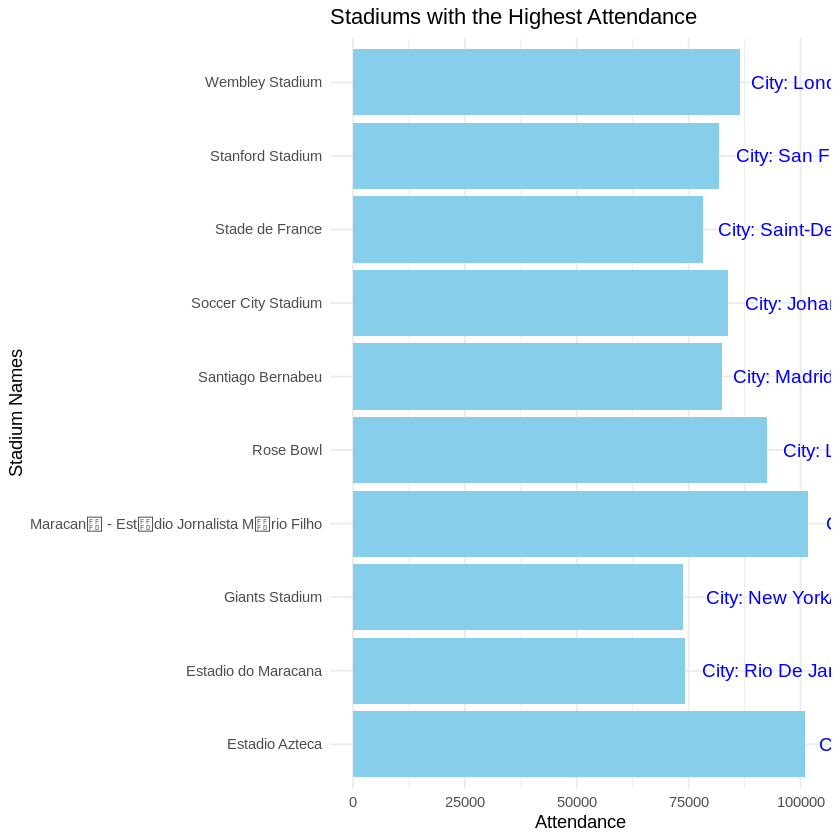

In [22]:
# Assuming your data frame is named 'matches'
library(ggplot2)

# Convert Year column to integer
matches$Year <- as.integer(matches$Year)

# Group by Stadium and City, calculate mean attendance, and sort
std <- aggregate(Attendance ~ Stadium + City, data = matches, FUN = mean)
std <- std[order(std$Attendance, decreasing = TRUE), ]

# Select top 10 stadiums
top10 <- head(std, 10)

# Create barplot using ggplot2
ggplot(top10, aes(x = Attendance, y = Stadium)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = paste("City:", City)), hjust = -0.1, color = "blue", size = 4) +
  labs(x = "Attendance", y = "Stadium Names", title = "Stadiums with the Highest Attendance") +
  theme_minimal()


In [26]:
# Assuming your data frame is named 'matches'
library(ggplot2)
library(dplyr)

# Calculate the count of matches for each country
country_counts <- matches %>%
  group_by(matches$Country) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

# Create barplot using ggplot2
ggplot(country_counts, aes(x = reorder(Country, Count), y = Count)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Country", y = "Number of Matches", title = "Number of Matches by Country") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Country' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)